<a href="https://colab.research.google.com/github/rajbalak/predictive-Analysis/blob/main/Prediction1_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded= files.upload()

Saving MRPlatest.xlsx to MRPlatest.xlsx


In [ ]:
import pandas as pd 
import io
df = pd.read_excel(io.BytesIO(uploaded['MRPlatest.xlsx']))
df.head()


,Shipment No.,Shipment Date,Item,Item Description,Location Code,Qty,Unit Cost
0,PS18-011054,2018-12-28,14Q-02ML,RECYCLING & WASTE BASKET 14 Q,RAWSON,1,2.23983
1,PS18-011072,2018-12-28,14Q-02ML,RECYCLING & WASTE BASKET 14 Q,RAWSON,2,2.23983
2,PS18-011083,2018-12-28,14Q-02ML,RECYCLING & WASTE BASKET 14 Q,RAWSON,10,2.23983
3,PS18-011084,2018-12-28,14Q-02ML,RECYCLING & WASTE BASKET 14 Q,RAWSON,18,2.23983
4,PS18-010972,2018-12-20,14Q-02ML,RECYCLING & WASTE BASKET 14 Q,RAWSON,30,2.23983


In [ ]:
df['Shipment Date'].min(), df['Shipment Date'].max()


(Timestamp('2015-01-07 00:00:00'), Timestamp('2018-12-28 00:00:00'))

In [ ]:
df.isnull().sum()

Shipment No.        0
Shipment Date       0
Item                0
Item Description    0
Location Code       0
Qty                 0
Unit Cost           0
dtype: int64

In [ ]:
df = df.set_index('Shipment Date')
df.index

DatetimeIndex(['2018-12-28', '2018-12-28', '2018-12-28', '2018-12-28',
               '2018-12-20', '2018-12-20', '2018-12-20', '2018-12-19',
               '2018-12-19', '2018-12-18',
               ...
               '2015-01-28', '2015-01-28', '2015-01-27', '2015-01-26',
               '2015-01-23', '2015-01-20', '2015-01-12', '2015-01-12',
               '2015-01-09', '2015-01-07'],
              dtype='datetime64[ns]', name='Shipment Date', length=881, freq=None)

In [ ]:
y = df['Qty'].resample('MS').mean()
y['2017':]


Shipment Date
2017-01-01     83.600000
2017-02-01     47.555556
2017-03-01     72.066667
2017-04-01    520.090909
2017-05-01     35.588235
2017-06-01    108.230769
2017-07-01     59.600000
2017-08-01     57.851852
2017-09-01    101.153846
2017-10-01    140.250000
2017-11-01     21.333333
2017-12-01     50.588235
2018-01-01    109.117647
2018-02-01     90.153846
2018-03-01     44.166667
2018-04-01     66.280000
2018-05-01     45.609756
2018-06-01     59.125000
2018-07-01    112.521739
2018-08-01     18.176471
2018-09-01     65.000000
2018-10-01     69.125000
2018-11-01    200.357143
2018-12-01     36.960000
Freq: MS, Name: Qty, dtype: float64

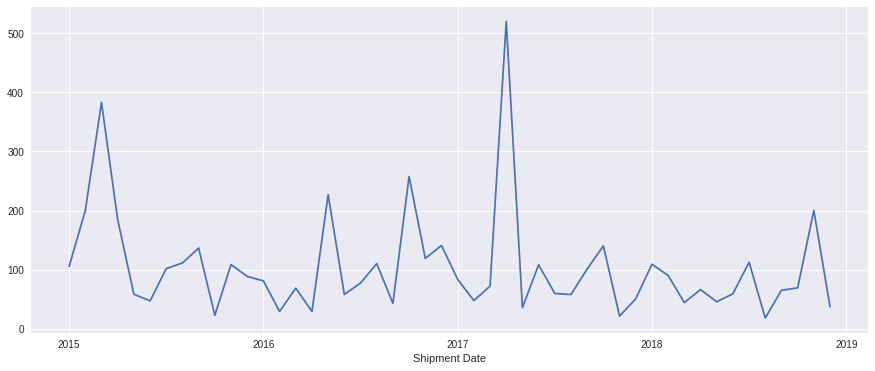

In [ ]:
import matplotlib.pyplot as plt
y.plot(figsize=(15, 6))
plt.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


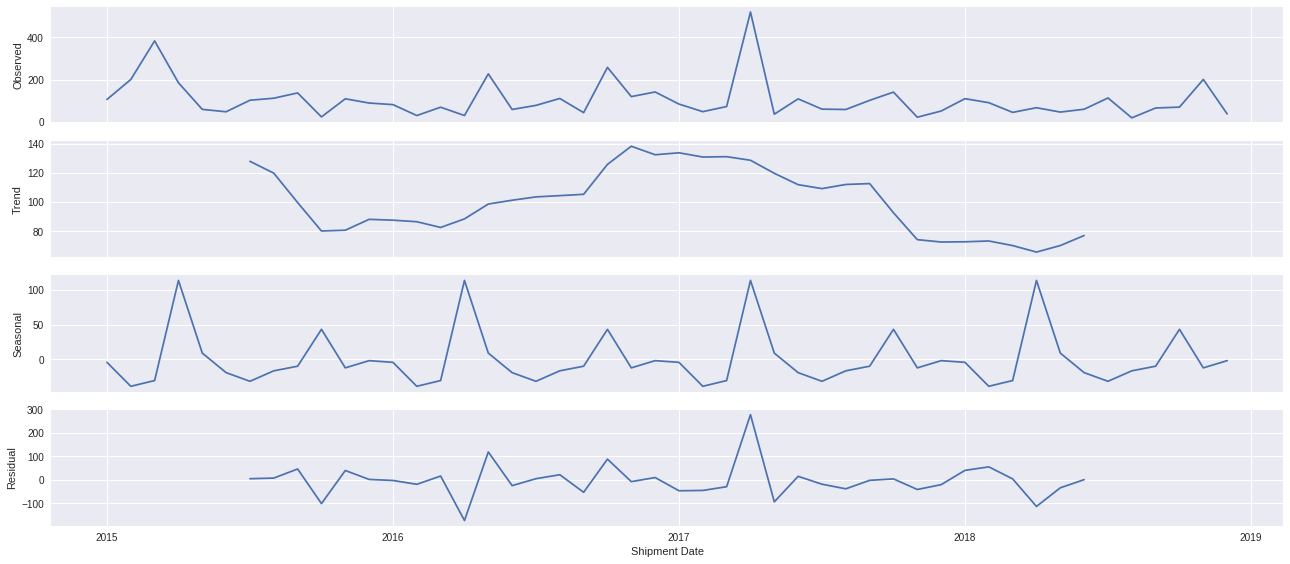

In [ ]:
import statsmodels.api as sm
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [ ]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [ ]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [ ]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3651      0.300     -1.219      0.223      -0.952       0.222
ma.L1         -1.0000      0.244     -4.095      0.000      -1.479      -0.521
ar.S.L12      -0.7145      0.184     -3.892      0.000      -1.074      -0.355
sigma2      1.158e+04   2.11e-05    5.5e+08      0.000    1.16e+04    1.16e+04


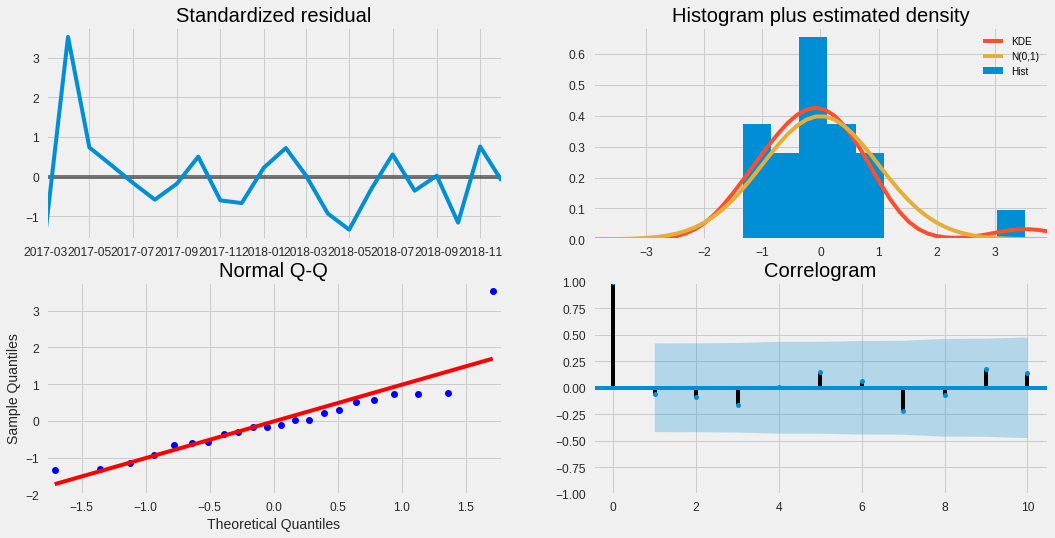

In [ ]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [ ]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()

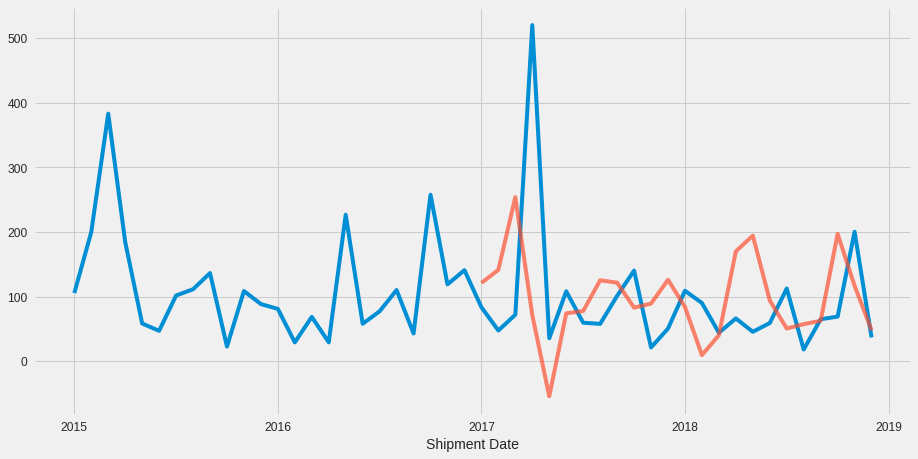

In [ ]:
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

In [ ]:
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 14286.23


In [ ]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 119.53


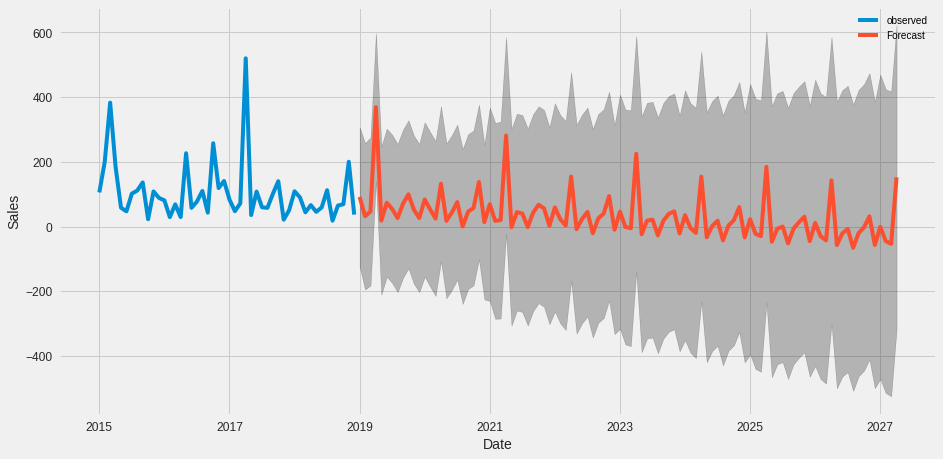

In [ ]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
plt.legend()
plt.show()